In [1]:
# 単変量統計
# 単変量だけを用いるため高速
# 他の特徴量との組み合わせで意味を持つものは捨てられる
# テストの方法を選択し、特徴量を捨てる基準も必要

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [7]:
import numpy as np
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 元のデータにノイズを追加
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# ノイズの加わったデータから50%を復元
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print("X_train:", X_train.shape)
print("X_train_selected", X_train_selected.shape)

X_train: (284, 80)
X_train_selected (284, 40)


In [8]:
import matplotlib.pyplot as plt
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


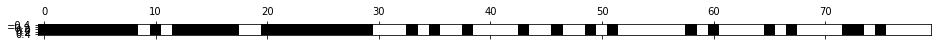

In [11]:
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [12]:
# 黒で塗りつぶされた部分が選択されている
# 元の特徴量の多くは選択されている

In [13]:
# モデルベース特徴量選択
# 重要な特徴量だけを抽出
# すべての特徴量を同時に見るので、交互作用を考慮して選択する

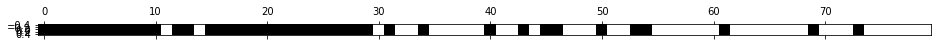

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# 特徴量を抽出するためのモデルを選択する
# 中央値で切り捨て
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

select.fit(X_train, y_train)
# 重要な特徴量だけを抽出
X_train_l1 = select.transform(X_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [16]:
# 反復特徴選択
# 単変量統計ではモデルをまったく使わず、モデルベースでは一つのモデルのみを用いた
# 反復特徴選択では異なる特徴量を用いた一連のモデルを作成する
# 特徴量がゼロの状態から一つずつ加えていくか、すべての特徴量を含む状態から一つずつ引いていくか(RFE)
# モデルを選択する必要がある
# 時間がかかる

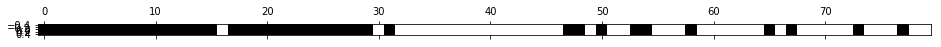

In [21]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')